In [7]:
! cd
! pip install -r yolov9/requirements.txt

C:\Users\mmandadi\work_proj\django_project\final_yr_project
  Using cached GitPython-3.1.42-py3-none-any.whl.metadata (12 kB)
  Using cached albumentations-1.4.2-py3-none-any.whl.metadata (36 kB)
  Using cached pycocotools-2.0.7.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached scikit_image-0.22.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached typing_extensions-4.10.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached smmap-5.0.1-py3-none-any

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-312\pycocotools
  running build_ext
  C:\Users\mmandadi\AppData\Local\Temp\pip-build-env-iwl_b_6_\overlay\Lib\site-packages\Cython\Compiler\Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: C:\Users\mmandadi\AppData\Local\Temp\pip-install-tyxjgpul\pycocotools_d88b1553fd1e43fcb60778fd90965018\pycocotools\_mask.pyx
    tree = Parsing.p_module(s, pxd, 

In [46]:
! python yolov9/detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights models_yolov9/best_numberplate.pt \
--source inputs/car_img.jpg \
--save-crop\
--project results --name exp

detect: weights=['models_yolov9/best_numberplate.pt'], source=inputs/car_img.jpg, data=yolov9\data\coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=results, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO  v0.1-75-g6924961 Python-3.12.1 torch-2.2.1+cu121 CUDA:0 (Quadro P1000, 4096MiB)

Fusing layers... 
yolov9 summary: 580 layers, 60495910 parameters, 0 gradients, 263.9 GFLOPs
image 1/1 C:\Users\mmandadi\work_proj\django_project\final_yr_project\inputs\car_img.jpg: 928x1280 4 License-plates, 678.2ms
Speed: 1.0ms pre-process, 678.2ms inference, 69.8ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to results\exp5


In [20]:
! pip install transformers



     ---------------------------------------- 0.0/134.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/134.8 kB ? eta -:--:--
     --- ------------------------------------ 10.2/134.8 kB ? eta -:--:--
     -------- ---------------------------- 30.7/134.8 kB 262.6 kB/s eta 0:00:01
     -------- ---------------------------- 30.7/134.8 kB 262.6 kB/s eta 0:00:01
     -------- ---------------------------- 30.7/134.8 kB 262.6 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/134.8 kB 151.3 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/134.8 kB 151.3 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/134.8 kB 151.3 kB/s eta 0:00:01
     ------------------------------ ----- 112.6/134.8 kB 297.7 kB/s eta 0:00:01
     ------------------------------------ 134.8/134.8 kB 306.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:-

In [22]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

In [47]:
# load image from the IAM database (actually this model is meant to be used on printed text)
url = 'C:/Users/mmandadi/work_proj/django_project/final_yr_project/results/exp5/crops/License-plate/car_img4.jpg'
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed") 
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

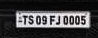

In [49]:
image = show_image(url)
image1 = image.crop((0, 10, image.size[0], 40))

In [53]:
str1=str(ocr_image(image1))
str1[1:]

'TS 09 FJ 0005'